https://www.kaggle.com/code/rahuljaiswal0303/taxi-fare-prediction-model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car_fare_train.csv")

In [3]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
df.shape

(209673, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [6]:
df.isna().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [7]:
df.duplicated().sum()

4325

In [8]:
df.drop_duplicates(inplace = True)

## EDA

### Data Visualization

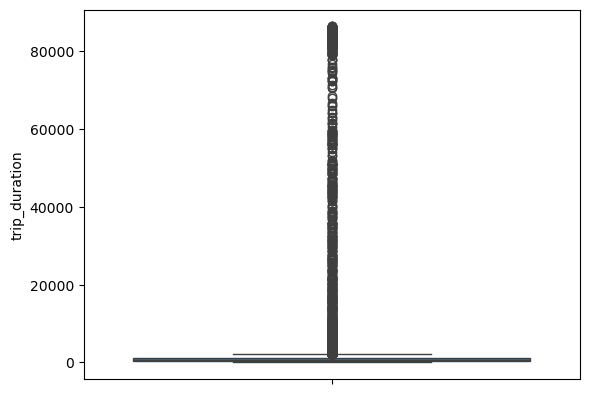

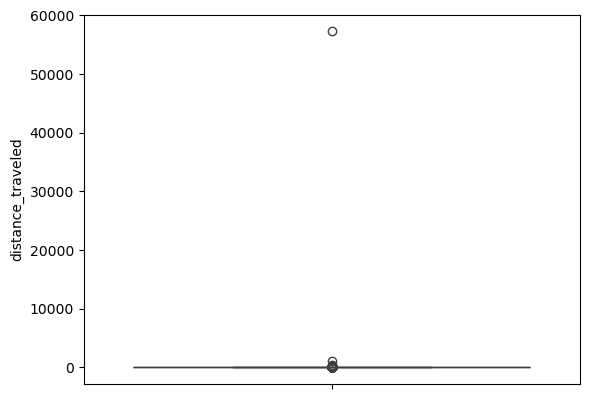

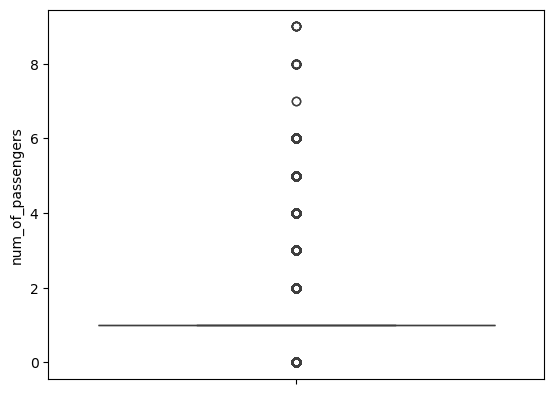

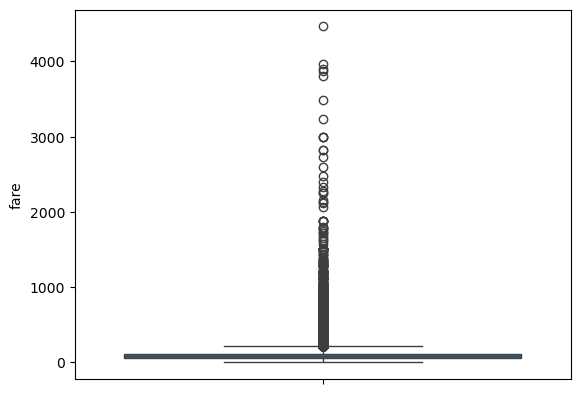

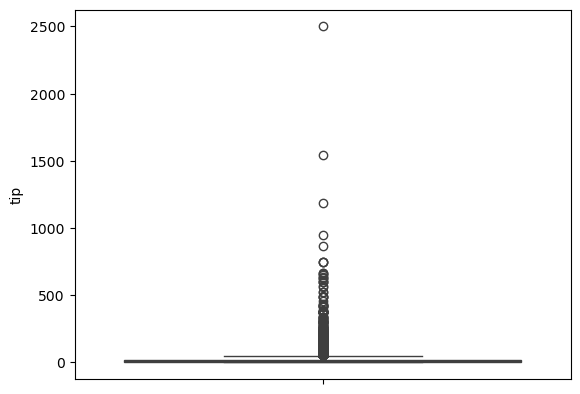

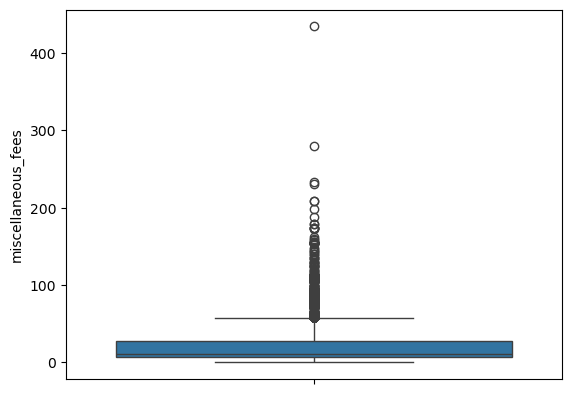

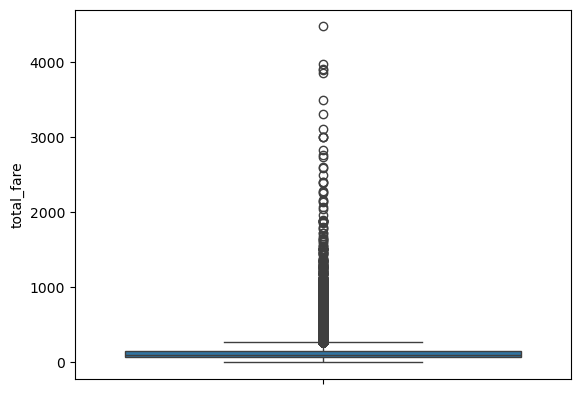

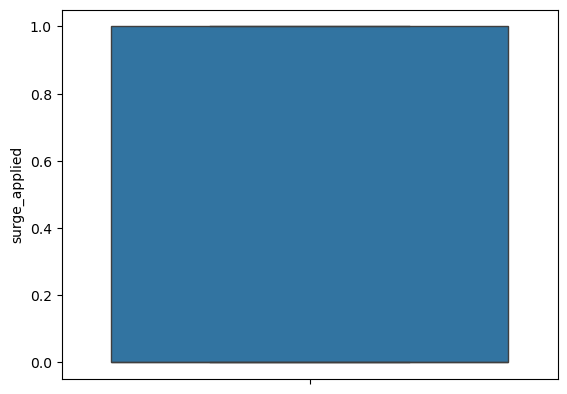

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
for cols in df.columns:
    sns.boxplot(data = df, y = cols)
    plt.show()

In [10]:
def Outlier_iqr(data, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    u_l = q3 + 1.5 * iqr
    l_l = q1 - 1.5 * iqr

    return (l_l, u_l)

In [11]:
cols = df.columns.drop(["total_fare","surge_applied"])
cols

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees'],
      dtype='object')

In [12]:
Outlier_iqr(df, "trip_duration")

(-530.0, 2094.0)

In [13]:
df.shape

(205348, 8)

In [14]:
for col in cols:
    l_l, u_l = Outlier_iqr(df, col)
    print(col," : ",((df[col] < l_l) | (df[col]> u_l)).sum())
    df[col] = df[col][~((df[col] < l_l) | (df[col] > u_l))]

trip_duration  :  11623
distance_traveled  :  16348
num_of_passengers  :  30389
fare  :  13616
tip  :  6770
miscellaneous_fees  :  2159


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205348 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       193725 non-null  float64
 1   distance_traveled   189000 non-null  float64
 2   num_of_passengers   174959 non-null  float64
 3   fare                191732 non-null  float64
 4   tip                 198578 non-null  float64
 5   miscellaneous_fees  203189 non-null  float64
 6   total_fare          205348 non-null  float64
 7   surge_applied       205348 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 14.1 MB


In [16]:
df.isna().sum()

trip_duration         11623
distance_traveled     16348
num_of_passengers     30389
fare                  13616
tip                    6770
miscellaneous_fees     2159
total_fare                0
surge_applied             0
dtype: int64

In [17]:
df.dropna(inplace = True)

In [18]:
df.shape

(155049, 8)

In [19]:
df.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

<Axes: >

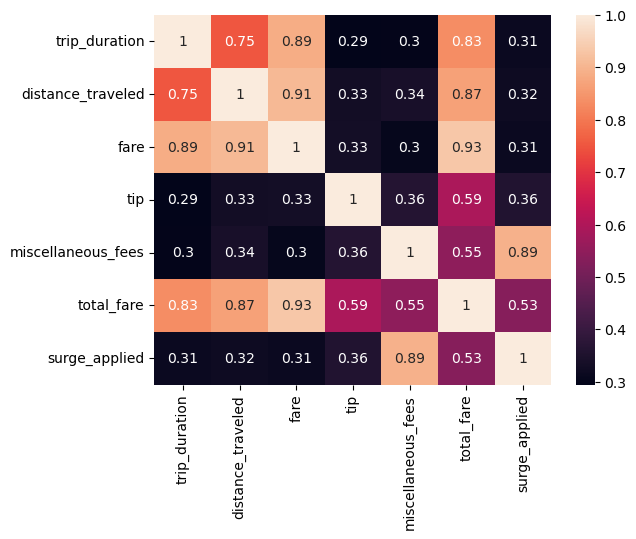

In [20]:
sns.heatmap(df.drop(columns = ["num_of_passengers"]).corr(), annot = True)

#### Insight from heat map
1-total fare and distance traveled , total fare and trip_duration are highly correlated but total fare is target varible, so it can not be drop.

2- distance_traveld and trip_duration are highly correlated , so we can drop one of them.

3- fare and total fare are highly correlated so drop we have to drop fare.

In [21]:
fare = df["fare"].copy()

<Axes: >

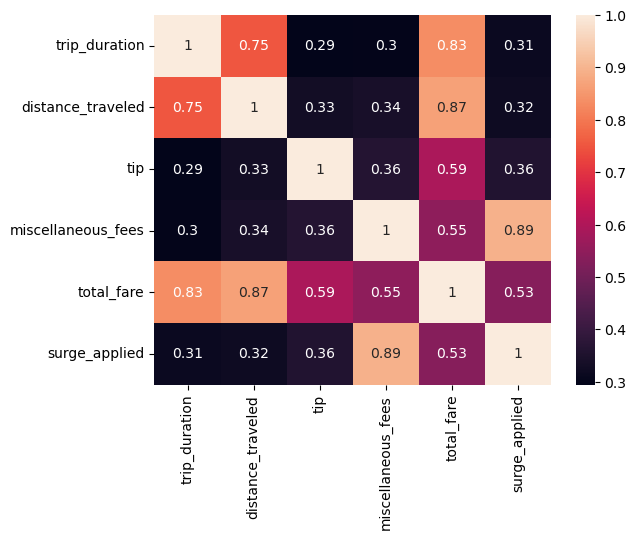

In [22]:
sns.heatmap(df.drop(columns =["fare", "num_of_passengers"]).corr(), annot = True)

In [23]:
df.drop(columns = ["fare"], inplace = True)

In [24]:
X = df.drop("total_fare", axis = 1)

In [25]:
y = df["total_fare"]

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
X_train["trip_duration"].mean()

726.9606494731496

In [29]:
X_train[X_train.columns.to_list()] = ss.fit_transform(X_train)
X_test[X_test.columns.to_list()] = ss.transform(X_test)

In [30]:
X_train

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
97273,-0.746233,-0.633907,0.0,0.171353,-0.043728,-0.612524
99019,-1.356191,-1.042174,0.0,2.294756,-0.845602,-0.612524
102911,-0.059411,-0.098056,0.0,0.680970,-0.820929,-0.612524
109767,-0.795823,-0.612643,0.0,0.935778,-1.117006,-0.612524
75247,-1.782666,1.420188,0.0,-0.932816,-0.796256,-0.612524
...,...,...,...,...,...,...
111214,-0.433816,-0.599885,0.0,1.615267,-0.796256,-0.612524
14917,-0.768549,-0.646665,0.0,-0.253327,-0.475507,-0.612524
4626,-0.570188,-0.429773,0.0,-0.932816,-0.796256,-0.612524
73545,-0.121398,-0.655171,0.0,-0.932816,-0.796256,-0.612524


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(lr, cv = 10, X =X_train, y = y_train, scoring = "r2")

In [33]:
r2_scores

array([0.96117497, 0.94202446, 0.95530528, 0.94563803, 0.94746979,
       0.95497598, 0.9499374 , 0.94897392, 0.96008266, 0.95455192])

In [34]:
r2_scores.mean()  

0.9520134394609817

In [35]:
r2_scores.std()

0.0059137257823425535

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

[]

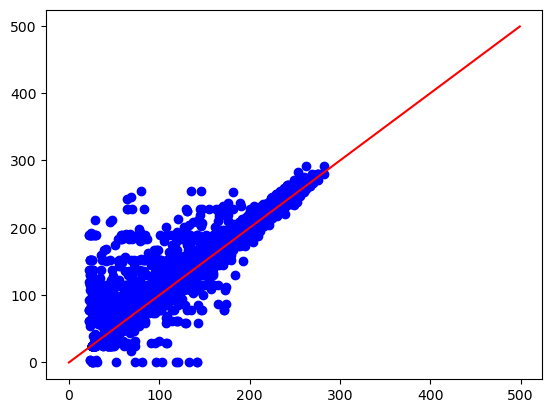

In [38]:
plt.scatter(y_pred,y_test, c= "b")
plt.plot(np.arange(0,500),np.arange(0,500), c= "r")
plt.plot()

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, lr.predict(X_test))

0.9536903669706577

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [41]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
r2_score(y_test, rfr.predict(X_test))

0.9801409157873496

In [43]:
df_test = pd.read_csv("car_fare_test.csv")

In [44]:
df_test.drop(columns = ["fare"], inplace = True)

In [45]:
cols = df_test.drop(columns = ["total_fare"]).columns.to_list()

In [46]:
for col in cols:
    l_l, u_l = Outlier_iqr(df_test, col)
    print(col," : ",((df_test[col] < l_l) | (df_test[col]> u_l)).sum())
    df_test[col] = df_test[col][~((df_test[col] < l_l) | (df_test[col] > u_l))]

trip_duration  :  7976
distance_traveled  :  11642
num_of_passengers  :  12996
tip  :  3328
miscellaneous_fees  :  887
surge_applied  :  0


In [47]:
df_test.dropna(inplace = True)

In [48]:
df_test.shape

(64543, 7)

In [49]:
X_test = df_test.drop(columns = ["total_fare"])
y_test = df_test["total_fare"]

In [50]:
X_test[X_test.columns.to_list()] = ss.transform(X_test)

In [51]:
X_test["num_of_passengers"].isna().sum()

0

In [52]:
X_test

,trip_duration,distance_traveled,num_of_passengers,tip,miscellaneous_fees,surge_applied
0,0.865444,0.254925,0.0,-0.932816,-0.056065,-0.612524
2,0.319954,0.242167,0.0,1.105651,-0.796256,-0.612524
3,-0.260250,-0.153342,0.0,0.341226,-0.833266,-0.612524
4,-0.545393,0.169869,0.0,-0.932816,-1.166352,-0.612524
6,-1.142954,-1.097460,0.0,-0.083455,-0.806125,-0.612524
...,...,...,...,...,...,...
89856,-0.723918,-0.570115,0.0,0.171353,-0.036327,-0.612524
89857,-0.515639,-0.412762,0.0,-0.338263,-0.021523,-0.612524
89858,-0.686725,-0.570115,0.0,-0.932816,1.239270,1.632589
89859,0.476162,0.229408,0.0,1.190587,1.592094,1.632589


In [53]:
lr.predict(X_test)

array([111.30092726, 121.8991867 ,  94.23372083, ...,  81.76769959,
       146.79261229,  98.11945959])